In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/home/test/c/Springboard/Capstone_Project_2'

In [3]:
ls -ltrh ./data/*.mov

-rw-r--r-- 1 test test 630M feb 16 16:16 ./data/zero-to-five.mov


In [4]:
# extract jpeg frames from .mov file: already done

# vidcap = cv2.VideoCapture('./Data/zero-to-five.mov')
# success,image = vidcap.read()
# count = 0

# while success:
#     cv2.imwrite("./Data/frame%d.jpg" % count, image)     # save frame as JPEG file      
#     success,image = vidcap.read()
#     if count%30 == 0:  # 30 frames per second for .mov video file
#         print('Reading the frame: ', count)
#     count += 1

# print('The last frame is: ', count)

In [5]:
# move manually the extracted frames to corresponding categories
# bases on frame number and time used for recording the 0 to 5 signs

In [6]:
# move 30% of all jpgs from /train to corresponding /test categories
# by simply moving to /test all frames that end with digits 0, 4 and 7

# mv ./data/train/0/*0.jpg ./data/test/0/
# mv ./data/train/0/*4.jpg ./data/test/0/
# mv ./data/train/0/*7.jpg ./data/test/0/
# mv ./data/train/1/*0.jpg ./data/test/1/
# mv ./data/train/1/*4.jpg ./data/test/1/
# mv ./data/train/1/*7.jpg ./data/test/1/
# mv ./data/train/2/*0.jpg ./data/test/2/
# mv ./data/train/2/*4.jpg ./data/test/2/
# mv ./data/train/2/*7.jpg ./data/test/2/
# mv ./data/train/3/*0.jpg ./data/test/3/
# mv ./data/train/3/*4.jpg ./data/test/3/
# mv ./data/train/3/*7.jpg ./data/test/3/
# mv ./data/train/4/*0.jpg ./data/test/4/
# mv ./data/train/4/*4.jpg ./data/test/4/
# mv ./data/train/4/*7.jpg ./data/test/4/
# mv ./data/train/5/*0.jpg ./data/test/5/
# mv ./data/train/5/*4.jpg ./data/test/5/
# mv ./data/train/5/*7.jpg ./data/test/5/

In [7]:
!du -h ./data/train

280M	./data/train/3
231M	./data/train/4
310M	./data/train/0
271M	./data/train/2
247M	./data/train/5
290M	./data/train/1
1,6G	./data/train


In [8]:
!du -h ./data/test

123M	./data/test/3
100M	./data/test/4
135M	./data/test/0
118M	./data/test/2
107M	./data/test/5
127M	./data/test/1
708M	./data/test


In [9]:
!find ./data/train -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

1759 ./data/train/4
1869 ./data/train/5
2074 ./data/train/2
2124 ./data/train/3
2240 ./data/train/1
2400 ./data/train/0
12467 ./data/train


In [10]:
!find ./data/test -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

747 ./data/test/4
799 ./data/test/5
887 ./data/test/2
913 ./data/test/3
962 ./data/test/1
1029 ./data/test/0
5338 ./data/test


After moving train and test data to corresponding classes, there are:

- 12460 training jpgs (and 7 directories, total = 12767)
- 5331 test jpgs (and 7 directories, total = 5338)
- 1.6 GB used for training jpgs
- 708 MB used for test jpgs

The number of files for each of the 6 classes in /train and /test is relatively equal with the exception of the classes 4 and 5 where I had to delete more jpgs due to recording issues.

In [11]:
print("tensorflow: ", tf.__version__)
print("cv2: ", cv2.__version__)

tensorflow:  2.0.0
cv2:  3.4.2


In [12]:
image0 = imread('./data/train/0/frame16768.jpg')

In [13]:
type(image0)

numpy.ndarray

In [14]:
image0.shape

(720, 1080, 3)

In [15]:
# This function will plot training images in the form of a grid with 2 row and 3 columns 
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 3, figsize=(20,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [16]:
samples=[]
samples.append(imread('./data/train/0/frame16768.jpg')) # sample class 0
samples.append(imread('./data/train/1/frame10118.jpg')) # sample class 1
samples.append(imread('./data/train/2/frame1.jpg')) # sample class 2
samples.append(imread('./data/train/3/frame3398.jpg')) # sample class 3
samples.append(imread('./data/train/4/frame6765.jpg')) # sample class 4
samples.append(imread('./data/train/5/frame13421.jpg')) # sample class 5

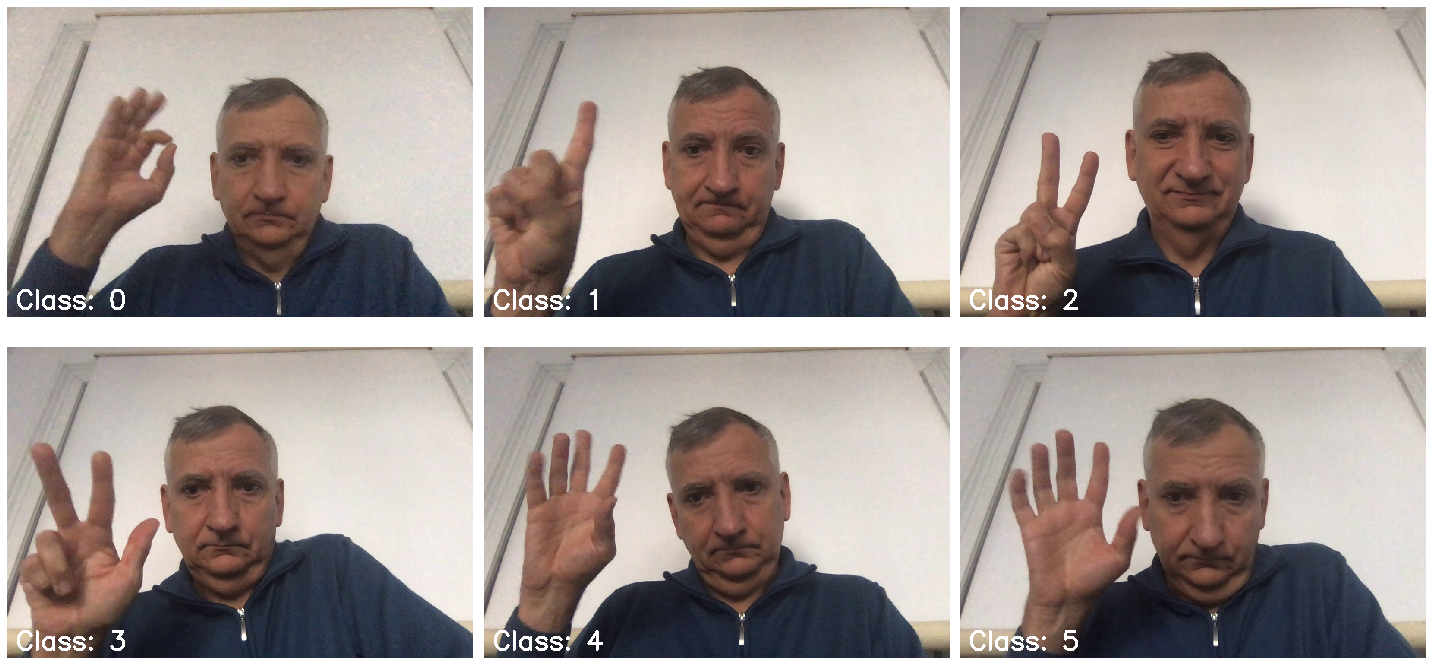

In [17]:
# Print the classes inside each jpeg sample
font      = cv2.FONT_HERSHEY_SIMPLEX
position  = (20,700)
fontScale = 2
fontColor = (255,255,255)
lineType  = 5

cv2.putText(samples[0], 'Class: 0', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[1], 'Class: 1', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[2], 'Class: 2', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[3], 'Class: 3', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[4], 'Class: 4', position, font, fontScale, fontColor, lineType)
cv2.putText(samples[5], 'Class: 5', position, font, fontScale, fontColor, lineType)

plotImages(samples)

In [18]:
# parameters
train_dir = './data/train'
test_dir = './data/test'
batch_size = 16
epochs = 10
# will rescale all jpeg images to 255x255 for having a reasonable time for the training
IMG_HEIGHT = 255
IMG_WIDTH = 255

image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [34]:
image_gen = ImageDataGenerator(rotation_range=10, # randomly rotate the image with <=10 degrees
                               #width_shift_range=0.10, # Shift the pic width by a max of 10%
                               #height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Normalize the image
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [35]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 12460 images belonging to 6 classes.


In [36]:
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=test_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                             )

Found 5331 images belonging to 6 classes.


The number of /train images is 12460, the number of /test images is 5331, as counted earlier with the bash commands

In [37]:
sample_training_images, sample_training_labels = next(train_data_gen)

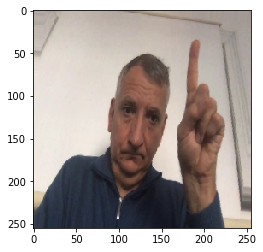

In [38]:
imshow(sample_training_images[2])

In [39]:
sample_training_labels[2]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [40]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    i=1
    for label in labels_arr:
        print("Image", i, " one-hot encoded class:", label)
        i+=1

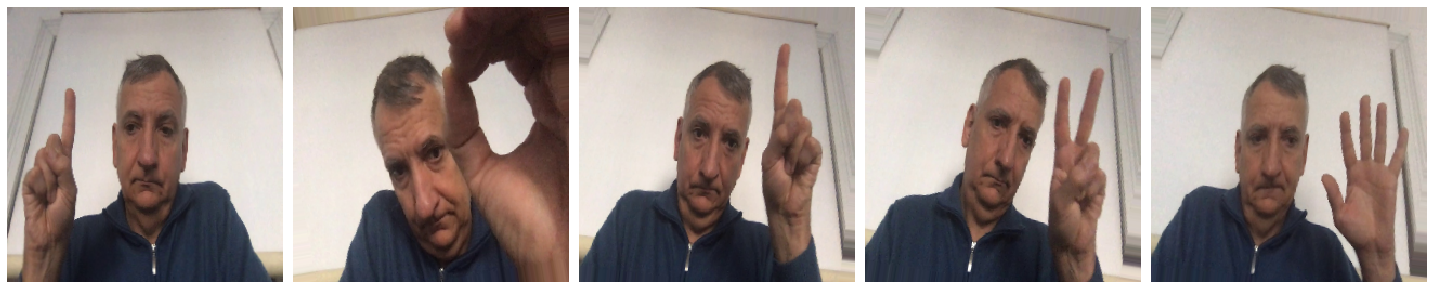

Image 1  one-hot encoded class: [0. 1. 0. 0. 0. 0.]
Image 2  one-hot encoded class: [1. 0. 0. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 1. 0. 0. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 1. 0. 0. 0.]
Image 5  one-hot encoded class: [0. 0. 0. 0. 0. 1.]


In [41]:
plotImages(sample_training_images[:5], sample_training_labels[:5])

ImageDataGenerator did the following:

- rotated the image by no more than of +- 20%
- no horizontal or vertical shift because the hand is close to one edge in some jpgs
- normalized the 0...255 values to the float interval 0...1
- rescaled the image to 255 x 255 pixels
- returned the image itself and the one-hot encoded class based on the class directory

In [42]:
sample_training_images[0].shape

(255, 255, 3)

In [43]:
print(sample_training_images[0].min(), sample_training_images[0].max())

0.052228414 0.9992897


In [44]:
train_data_gen.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [45]:
test_data_gen.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

The classes are 0, 1, 2, 3, 4, 5 for both train and test data

In [46]:
image_shape

(255, 255, 3)

# Training the model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [49]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(255))
model.add(Activation('relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 255)               6397695   
_________________________________________________________________
activation_1 (Activation)    (None, 255)              

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [53]:
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              callbacks=[early_stop])

Epoch 1/10
779/779 [==============================] - 1406s 2s/step - loss: 0.4699 - accuracy: 0.8408 - val_loss: 0.1301 - val_accuracy: 0.9552
Epoch 2/10
779/779 [==============================] - 1342s 2s/step - loss: 0.1064 - accuracy: 0.9648 - val_loss: 0.0446 - val_accuracy: 0.9857
Epoch 3/10
779/779 [==============================] - 1386s 2s/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0479 - val_accuracy: 0.9841
Epoch 4/10
779/779 [==============================] - 1293s 2s/step - loss: 0.0371 - accuracy: 0.9876 - val_loss: 0.0459 - val_accuracy: 0.9831


In [54]:
from tensorflow.keras.models import load_model
model.save('second_CNN-6categories_model.h5')

In [43]:
# initial run
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              callbacks=[early_stop])

Epoch 1/10
779/779 [==============================] - 2137s 3s/step - loss: 13.2103 - accuracy: 0.1795 - val_loss: 13.2065 - val_accuracy: 0.1803
Epoch 2/10
779/779 [==============================] - 2118s 3s/step - loss: 13.2218 - accuracy: 0.1797 - val_loss: 13.2196 - val_accuracy: 0.1803
Epoch 3/10
779/779 [==============================] - 2255s 3s/step - loss: 13.2218 - accuracy: 0.1797 - val_loss: 13.2065 - val_accuracy: 0.1803
Epoch 4/10
779/779 [==============================] - 2101s 3s/step - loss: 13.2201 - accuracy: 0.1797 - val_loss: 13.2196 - val_accuracy: 0.1803
Epoch 5/10
779/779 [==============================] - 2112s 3s/step - loss: 13.2223 - accuracy: 0.1797 - val_loss: 13.2196 - val_accuracy: 0.1803


In [44]:
model.save('first_CNN-6categories_model.h5')

# Evaluating the Model

In [55]:
losses = pd.DataFrame(model.history.history)

In [56]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.470001,0.840770,0.130066,0.955168
1,0.106418,0.964767,0.044565,0.985744
2,0.061417,0.981220,0.047886,0.984056
3,0.037080,0.987640,0.045942,0.983118


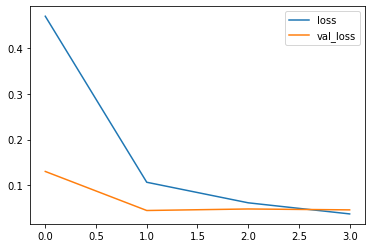

In [57]:
losses[['loss','val_loss']].plot()

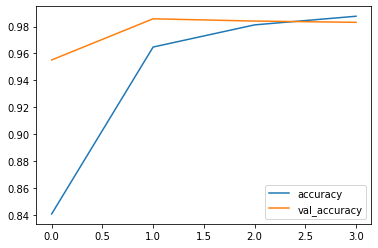

In [58]:
losses[['accuracy','val_accuracy']].plot()

In [59]:
model.metrics_names

['loss', 'accuracy']

In [61]:
model.evaluate_generator(test_data_gen)

[0.04508716872695679, 0.9823673]

In [62]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = model.predict_generator(test_data_gen)